In [5]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from feature_selection import X_selected
from preprocessing import y

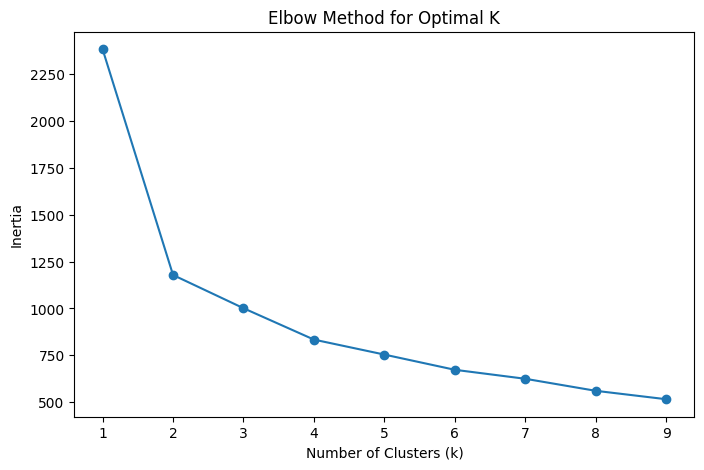

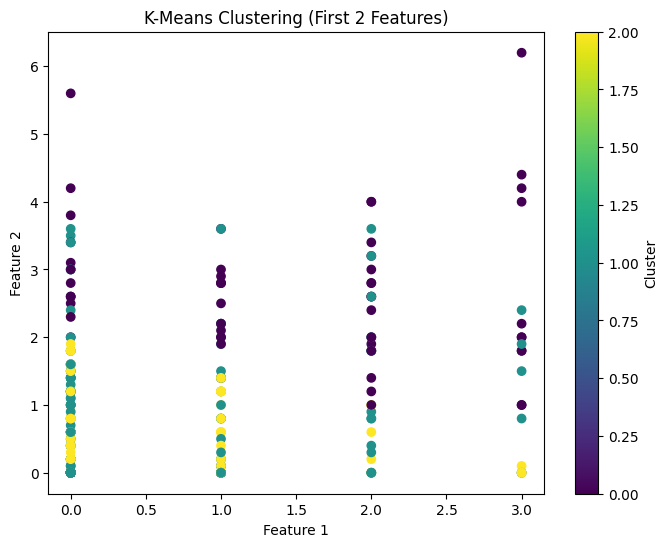

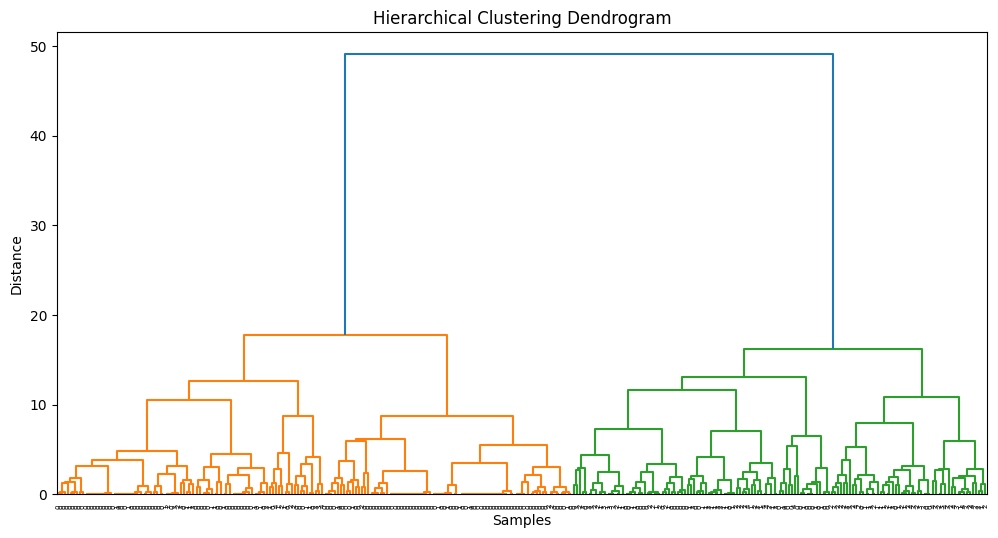


Adjusted Rand Index (K-Means vs True Labels): 0.3032
Adjusted Rand Index (Hierarchical vs True Labels): 0.0595


In [6]:
###Unsupervised Learning - Clustering###

X_final = X_selected.values
y_final = y

# Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_final)
    inertia.append(kmeans.inertia_)

# Elbow plot to determine optimal number of clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'o-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Pick k from the elbow plot
k_opt = 3

# K-Means Clustering
kmeans= KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans_labels= kmeans.fit_predict(X_final)

# K-Means scatter plot (first 2 features)
plt.figure(figsize=(8,6))
plt.scatter(X_final[:,0], X_final[:,1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (First 2 Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Hierarchal Clustering
linked= linkage(X_final, method='ward')
hier_labels= fcluster(linked, t=k_opt, criterion='maxclust')

# Dendrogram plot
plt.figure(figsize=(12,6))
dendrogram(linked, labels=y_final, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Compare clusters with true labels
ari_kmeans= adjusted_rand_score(y_final,kmeans_labels)
ari_hier= adjusted_rand_score(y_final, hier_labels)
print(f"\nAdjusted Rand Index (K-Means vs True Labels): {ari_kmeans:.4f}")
print(f"Adjusted Rand Index (Hierarchical vs True Labels): {ari_hier:.4f}")
